In [69]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')
import seaborn as sns
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc
# For Feature Explanations
import shap
# load JS visualization code to notebook
shap.initjs()

In [70]:
# Configurations
STATE = 'CA'

In [71]:
df = pd.read_csv(f'../output/accident_data_{STATE}.csv')

df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Weekday,Time_Duration(min),grid_4,grid_1000m,grid_100m,grid_10m,previous_1,previous_2,previous_3
0,292,292,512592,A-512598,MapQuest,201.0,2,2019-12-24 22:31:36,2019-12-25 00:16:13,37.980042,-121.746063,NaN,NaN,0.69,Accident on exit ramp from CA-4 Eastbound at E...,NaN,CA-4 E,R,Antioch,Contra Costa,CA,94531,US,US/Pacific,KCCR,2019-12-24 22:51:00,50.0,50.0,76.0,29.84,10.0,S,6.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,Dec,24,22,Tue,105.0,10S FH 1012 0434,10S FH 10 04,10S FH 101 043,10S FH 1012 0434,0.0,0.0,0.0
1,293,293,512593,A-512599,MapQuest-Bing,201.0,3,2019-12-24 22:32:19,2019-12-24 23:16:48,38.120399,-122.230270,NaN,NaN,0.93,Exit ramp from I-80 Northbound at Exits 32 32A...,NaN,I-80 E,R,Vallejo,Solano,CA,94591,US,US/Pacific,KAPC,2019-12-24 22:46:00,44.0,44.0,93.0,29.85,10.0,E,3.0,0.0,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,Dec,24,22,Tue,44.0,10S EH 6747 1945,10S EH 67 19,10S EH 674 194,10S EH 6747 1945,0.0,0.0,0.0
2,294,294,512594,A-512600,MapQuest,201.0,3,2019-12-24 22:42:06,2019-12-24 23:11:34,37.320969,-121.899612,NaN,NaN,0.90,Accident on exit ramp from I-280 Southbound at...,NaN,I-280 S,R,San Jose,Santa Clara,CA,95125,US,US/Pacific,KSJC,2019-12-24 22:53:00,47.0,43.0,83.0,29.85,10.0,SSE,9.0,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,Dec,24,22,Tue,29.0,10S EG 9749 3104,10S EG 97 31,10S EG 974 310,10S EG 9749 3104,0.0,0.0,0.0
3,295,295,512595,A-512601,MapQuest,201.0,2,2019-12-24 22:45:41,2019-12-25 00:00:14,37.145073,-121.984749,NaN,NaN,0.00,#1 lane blocked due to accident on CA-17 North...,NaN,Santa Cruz Hwy,R,Los Gatos,Santa Clara,CA,95033,US,US/Pacific,KSJC,2019-12-24 22:53:00,47.0,43.0,83.0,29.85,10.0,SSE,9.0,0.0,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,Dec,24,22,Tue,75.0,10S EG 9016 1144,10S EG 90 11,10S EG 901 114,10S EG 9016 1144,0.0,0.0,0.0
4,296,296,512597,A-512603,MapQuest-Bing,201.0,3,2019-12-25 00:03:35,2019-12-25 00:33:09,38.022110,-122.263451,NaN,NaN,0.32,Entry ramp to I-80 Southbound from Willow Ave ...,NaN,I-80 W,R,Hercules,Contra Costa,CA,94547,US,US/Pacific,KCCR,2019-12-25 00:53:00,49.0,46.0,77.0,29.81,10.0,S,7.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2019,Dec,25,0,Wed,30.0,10S EH 6464 0852,10S EH 64 08,10S EH 646 085,10S EH 6464 0852,0.0,0.0,0.0


In [72]:
# Feature Extraction & Preprocessing

In [73]:
# Set the list of features to include in Machine Learning
feature_lst=['Source', 'Severity','Start_Lng','Start_Lat','Distance(mi)',
             'Side','City','County','State','Timezone','Temperature(F)',
             'Humidity(%)','Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
             'Weather_Condition','Amenity','Bump','Crossing','Give_Way',
             'Junction','No_Exit','Railway','Roundabout','Station','Stop',
             'Traffic_Calming','Traffic_Signal','Turning_Loop',
             'Sunrise_Sunset','Hour','Weekday', 
             'previous_1', 'previous_2', 'previous_3',
             ]

In [74]:
# Select the dataset to include only the selected features
df_sel=df[feature_lst].copy()
print(df_sel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177180 entries, 0 to 177179
Data columns (total 35 columns):
Source               177180 non-null object
Severity             177180 non-null int64
Start_Lng            177180 non-null float64
Start_Lat            177180 non-null float64
Distance(mi)         177180 non-null float64
Side                 177180 non-null object
City                 177179 non-null object
County               177180 non-null object
State                177180 non-null object
Timezone             177114 non-null object
Temperature(F)       172080 non-null float64
Humidity(%)          171840 non-null float64
Pressure(in)         173590 non-null float64
Visibility(mi)       173103 non-null float64
Wind_Direction       172049 non-null object
Weather_Condition    173050 non-null object
Amenity              177180 non-null bool
Bump                 177180 non-null bool
Crossing             177180 non-null bool
Give_Way             177180 non-null bool
Junction   

In [75]:
# Check missing values
df_sel.isnull().mean()

Source               0.000000
Severity             0.000000
Start_Lng            0.000000
Start_Lat            0.000000
Distance(mi)         0.000000
Side                 0.000000
City                 0.000006
County               0.000000
State                0.000000
Timezone             0.000373
Temperature(F)       0.028784
Humidity(%)          0.030139
Pressure(in)         0.020262
Visibility(mi)       0.023010
Wind_Direction       0.028959
Weather_Condition    0.023310
Amenity              0.000000
Bump                 0.000000
Crossing             0.000000
Give_Way             0.000000
Junction             0.000000
No_Exit              0.000000
Railway              0.000000
Roundabout           0.000000
Station              0.000000
Stop                 0.000000
Traffic_Calming      0.000000
Traffic_Signal       0.000000
Turning_Loop         0.000000
Sunrise_Sunset       0.000006
Hour                 0.000000
Weekday              0.000000
previous_1           0.000000
previous_2

In [76]:
df_sel.dropna(subset=df_sel.columns[df_sel.isnull().mean()!=0], how='any', axis=0, inplace=True)
df_sel.shape

(169881, 35)

In [77]:
df_state = df_sel.drop('State', axis=1)
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169881 entries, 0 to 177179
Data columns (total 34 columns):
Source               169881 non-null object
Severity             169881 non-null int64
Start_Lng            169881 non-null float64
Start_Lat            169881 non-null float64
Distance(mi)         169881 non-null float64
Side                 169881 non-null object
City                 169881 non-null object
County               169881 non-null object
Timezone             169881 non-null object
Temperature(F)       169881 non-null float64
Humidity(%)          169881 non-null float64
Pressure(in)         169881 non-null float64
Visibility(mi)       169881 non-null float64
Wind_Direction       169881 non-null object
Weather_Condition    169881 non-null object
Amenity              169881 non-null bool
Bump                 169881 non-null bool
Crossing             169881 non-null bool
Give_Way             169881 non-null bool
Junction             169881 non-null bool
No_Exit      

In [78]:
# Generate dummies for categorical data
df_train = pd.get_dummies(df_state,drop_first=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169881 entries, 0 to 177179
Columns: 1149 entries, Severity to Weekday_Wed
dtypes: bool(13), float64(10), int64(2), uint8(1124)
memory usage: 201.1 MB


In [79]:
# Set the target for the prediction
target='Severity'

# Create arrays for the features and the response variable

# set X and y
y = df_train[target] >= 3
X = df_train.drop(target, axis=1)

# Split the data set into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)

In [80]:
model = RandomForestClassifier()

model.fit(X_train[:1000], y_train[:1000])

y_pred = model.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

print("[Logistic regression algorithm] accuracy_score: {:.3f}.".format(acc))

print(classification_report(y_test, y_pred))

[Logistic regression algorithm] accuracy_score: 0.875.
              precision    recall  f1-score   support

       False       0.89      0.96      0.92     26692
        True       0.80      0.56      0.66      7285

    accuracy                           0.88     33977
   macro avg       0.84      0.76      0.79     33977
weighted avg       0.87      0.88      0.87     33977



In [43]:
# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


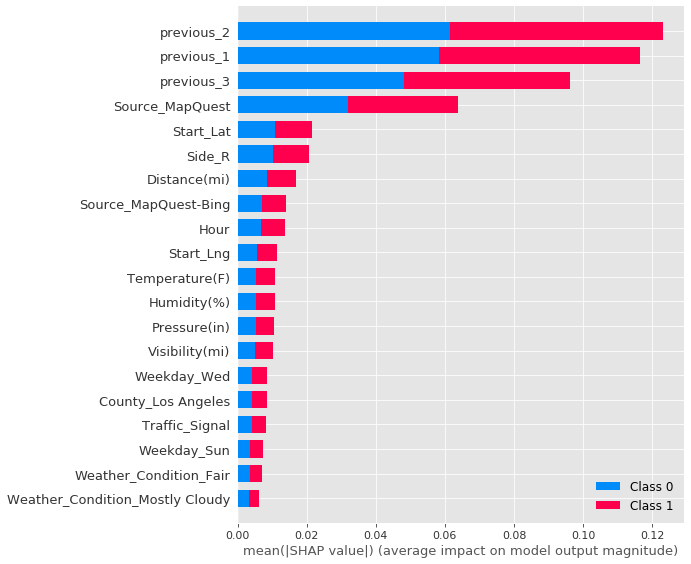

In [48]:
sample = X_test.sample(n=1000)
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample)

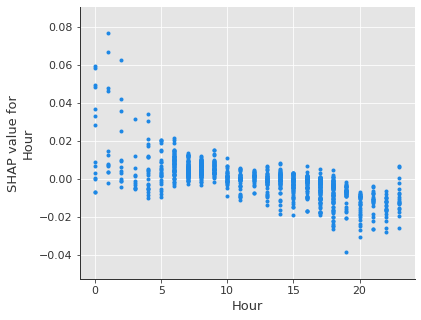

In [59]:
shap.dependence_plot("Hour", shap_values[0], sample, interaction_index=None)

In [33]:
sample = X_test.sample(n=1)
shap_values = explainer.shap_values(sample)
shap.force_plot(explainer.expected_value[0], shap_values[0], feature_names=sample.columns)

False False


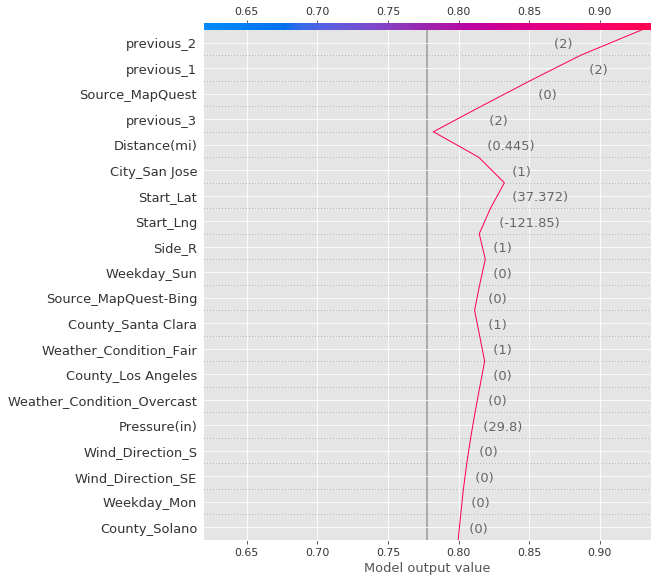

In [132]:
sample = X_test.sample(n=1)
print(y_test[sample.index[0]], y_pred[y_test.index.get_loc(sample.index[0])])
shap_values = explainer.shap_values(sample)
shap.decision_plot(explainer.expected_value[0], shap_values[0], sample)